# Proyecto de Machine Learning - Premier League

**Autor**: Juan José Fernández Moreno  
**Fecha**: Abril 2025

---

## Descripción del proyecto

Este proyecto aplica técnicas de **Machine Learning** al análisis de datos de la **Premier League**, con el objetivo de extraer patrones relevantes y realizar predicciones para el mercado de ***más/menos 2,5 goles*** a partir del comportamiento de los equipos a lo largo de diferentes temporadas.


---

## Contenido del notebook

1. Introducción y objetivos  
2. Carga y exploración de datos  
3. Limpieza y preprocesamiento  
4. Análisis exploratorio  
5. Ingeniería de características  
6. Entrenamiento de modelos  
7. Evaluación de resultados  
8. Conclusiones y posibles mejoras

---

## Dataset

Se utiliza un conjunto de datos relacionados con la **Premier League**, incluyendo la información de los partidos de esta liga a través de varias temporadas. El dataset ha sido procesado y adaptado para facilitar su uso en modelos de Machine Learning.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, make_scorer, f1_score, precision_score, recall_score
import joblib
import optuna
import warnings

c:\Users\juanj\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [427]:
# Ignorar warnings
warnings.filterwarnings("ignore")

# Estilo visual para gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

# Mostrar todas las columnas de los DataFrames
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("../data_sample/PremierLeague.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11880 entries, 0 to 11879
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MatchID                 11880 non-null  object 
 1   Season                  11880 non-null  object 
 2   MatchWeek               11880 non-null  int64  
 3   Date                    11880 non-null  object 
 4   Time                    2000 non-null   object 
 5   HomeTeam                11880 non-null  object 
 6   AwayTeam                11880 non-null  object 
 7   FullTimeHomeTeamGoals   11880 non-null  int64  
 8   FullTimeAwayTeamGoals   11880 non-null  int64  
 9   FullTimeResult          11880 non-null  object 
 10  HalfTimeHomeTeamGoals   11120 non-null  float64
 11  HalfTimeAwayTeamGoals   11120 non-null  float64
 12  HalfTimeResult          11120 non-null  object 
 13  Referee                 9220 non-null   object 
 14  HomeTeamShots           9220 non-null 

In [430]:
df["Date"] = pd.to_datetime(df["Date"])

In [431]:
df.sample(20)

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,HalfTimeResult,Referee,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamCorners,AwayTeamCorners,HomeTeamFouls,AwayTeamFouls,HomeTeamYellowCards,AwayTeamYellowCards,HomeTeamRedCards,AwayTeamRedCards,B365HomeTeam,B365Draw,B365AwayTeam,B365Over2.5Goals,B365Under2.5Goals,MarketMaxHomeTeam,MarketMaxDraw,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
351,1993-1994_Swindon_Man United,1993-1994,30,1994-03-19,NaN,Swindon,Man United,2,2,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
6048,2008-2009_Aston Villa_Hull,2008-2009,36,2009-05-04,NaN,Aston Villa,Hull,1,0,H,1.0,0.0,H,M Dean,12.0,9.0,8.0,5.0,13.0,7.0,13.0,10.0,0.0,2.0,0.0,0.0,1.530,3.80,7.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
8259,2014-2015_Arsenal_West Ham,2014-2015,29,2015-03-14,NaN,Arsenal,West Ham,3,0,H,1.0,0.0,H,A Taylor,19.0,7.0,9.0,1.0,7.0,5.0,10.0,9.0,1.0,1.0,0.0,0.0,1.400,5.00,9.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
9097,2016-2017_Bournemouth_Burnley,2016-2017,37,2017-05-13,NaN,Bournemouth,Burnley,2,1,H,1.0,0.0,H,L Probert,18.0,14.0,6.0,3.0,7.0,1.0,6.0,11.0,0.0,1.0,0.0,0.0,1.910,3.75,4.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
1700,1997-1998_Blackburn_West Ham,1997-1998,16,1997-12-20,NaN,Blackburn,West Ham,3,0,H,1.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
4205,2004-2005_Newcastle_Norwich,2004-2005,3,2004-08-25,NaN,Newcastle,Norwich,2,2,D,1.0,0.0,H,M Halsey,23.0,13.0,15.0,5.0,12.0,6.0,17.0,10.0,0.0,1.0,0.0,0.0,1.440,4.00,7.500,1.80,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
5767,2008-2009_Tottenham_Hull,2008-2009,7,2008-10-05,NaN,Tottenham,Hull,0,1,A,0.0,1.0,A,R Styles,27.0,10.0,16.0,6.0,12.0,0.0,15.0,15.0,4.0,2.0,0.0,0.0,1.730,3.75,4.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
2797,2000-2001_Tottenham_Liverpool,2000-2001,13,2000-11-19,NaN,Tottenham,Liverpool,2,1,H,2.0,1.0,H,Mark Halsey,6.0,9.0,4.0,4.0,6.0,5.0,11.0,13.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
11484,2023-2024_Newcastle_Crystal Palace,2023-2024,9,2023-10-21,15:00,Newcastle,Crystal Palace,4,0,H,3.0,0.0,H,T Robinson,10.0,17.0,7.0,3.0,6.0,8.0,7.0,12.0,2.0,3.0,0.0,0.0,1.450,4.50,7.000,1.85,2.05,1.50,4.80,8.00,1.46,4.53,7.44,1.87,2.10,1.82,2.03,3,0
353,1993-1994_West Ham_Newcastle,1993-1994,30,1994-03-19,NaN,West Ham,Newcastle,2,4,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3


#### **Filtrar dataset para entrenar** 
Obtenemos los datos desde **2014**, que son los que se van a utilizar para entrenar los modelos.  

**¿Por qué esta selección?**  
No es recomendable fijarse en datos muy antiguos, que pueden no ser representativos del fútbol actual. Por otro lado, se necesitan datos suficientes para entrenar un modelo de *machine learning* y obtener predicciones más o menos confiables.  

Por estos motivos, se ha decidido hacer un corte intermedio, prescindir de datos muy antiguos pero tener la información de, al menos, los últimos 10 años.

In [432]:
df = df[df.Date > "2014-08-01"]

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 7980 to 11879
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MatchID                 3900 non-null   object        
 1   Season                  3900 non-null   object        
 2   MatchWeek               3900 non-null   int64         
 3   Date                    3900 non-null   datetime64[ns]
 4   Time                    2000 non-null   object        
 5   HomeTeam                3900 non-null   object        
 6   AwayTeam                3900 non-null   object        
 7   FullTimeHomeTeamGoals   3900 non-null   int64         
 8   FullTimeAwayTeamGoals   3900 non-null   int64         
 9   FullTimeResult          3900 non-null   object        
 10  HalfTimeHomeTeamGoals   3900 non-null   float64       
 11  HalfTimeAwayTeamGoals   3900 non-null   float64       
 12  HalfTimeResult          3900 non-null   object   

#### **Limpieza de datos y feature engineering**
> Nota: En este proyecto se ha realizado la ingeniería de variables y la limpieza del dataset **antes de separar en train-test**, ya que las transformaciones aplicadas no dependen del resultado objetivo ni de información futura. De esta forma se evita la duplicación de código y se mantiene la coherencia en los datos.

Una vez filtrados los datos correspondientes a las últimas temporadas, se procede a eliminar aquellas variables que no aportan valor significativo al entrenamiento del modelo. 

Se descartan columnas como `"MatchID"`, `"MatchWeek"`, `"Date"`, `"Time"`, `"Referee"` y diversas cuotas de mercados de apuestas, ya que:

- No contienen información útil para la predicción del objetivo (*generado más adelante*).
- Pueden actuar como identificadores o metadatos sin valor predictivo.
- Algunas podrían introducir ruido o sesgo innecesario en el modelo.

Este paso permite reducir la dimensionalidad del dataset y centrarse únicamente en variables con verdadero potencial explicativo.

In [434]:
columns_to_delete = ["FullTimeResult", "MatchID", "MatchWeek", "Date", "Time", "HalfTimeHomeTeamGoals", "HalfTimeAwayTeamGoals", "HalfTimeResult", "Referee"]
df.drop(columns=columns_to_delete, inplace=True)

In [435]:
# Aquí se eliminan todas las columnas de cuotas y mercados de apuestas, dejando sólo las variables interesantes para los modelos

df_split = df.iloc[:, :9]

In [436]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 7980 to 11879
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season                 3900 non-null   object 
 1   HomeTeam               3900 non-null   object 
 2   AwayTeam               3900 non-null   object 
 3   FullTimeHomeTeamGoals  3900 non-null   int64  
 4   FullTimeAwayTeamGoals  3900 non-null   int64  
 5   HomeTeamShots          3900 non-null   float64
 6   AwayTeamShots          3900 non-null   float64
 7   HomeTeamShotsOnTarget  3900 non-null   float64
 8   AwayTeamShotsOnTarget  3900 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 304.7+ KB


**Obtención del *target* (goles totales) a través de *"FullTimeHomeTeamGoals"* y *"FullTimeAwayTeamGoals"***

In [437]:
df_split["TotalGoals"] = df_split["FullTimeHomeTeamGoals"] + df_split["FullTimeAwayTeamGoals"]

##### **Generación de nuevas features interesantes**  
Con el objetivo de enriquecer el dataset y proporcionar al modelo variables más representativas del rendimiento de cada equipo, se genera una serie de nuevas características a partir de los datos existentes. Estas variables se calculan tanto para el equipo local como para el visitante, permitiendo así una comparación equilibrada de sus desempeños recientes.

Todas las nuevas features se construyen **a partir de información histórica y acumulada hasta el momento del partido**, respetando la cronología para evitar introducir *data leakage*. 

Las nuevas variables generadas son:

- **Racha de partidos con más de 2.5 goles** *(por equipo y temporada)*  
- **Racha de partidos con menos de 2.5 goles** *(por equipo y temporada)*  
- **Precisión de tiro**: proporción de tiros que van a portería sobre el total de tiros realizados  
- **Ratio de goles por disparos totales**  
- **Efectividad ofensiva**: proporción de goles anotados sobre tiros a portería  

Estas nuevas features aportan una visión más completa del rendimiento ofensivo y defensivo de cada equipo en el contexto de la temporada, y están diseñadas para mejorar la capacidad predictiva de los modelos de clasificación.

In [438]:
rachas_over = {}
rachas_under = {}

umbral_over_under = 2.5

temporada_actual = None

for index, row in df_split.iterrows():
    season = row["Season"]
    home_team = row["HomeTeam"]
    away_team = row["AwayTeam"]
    total_goals = row["TotalGoals"]

    # Si la temporada cambia, resetear las rachas
    if season != temporada_actual:
        rachas_over = {} 
        rachas_under = {} 
        temporada_actual = season

    # Obtener la racha actual de cada equipo o inicializar en 0 si no existe
    racha_over_home = rachas_over.get(home_team, 0)
    racha_over_away = rachas_over.get(away_team, 0)
    racha_under_home = rachas_under.get(home_team, 0)
    racha_under_away = rachas_under.get(away_team, 0)

    # Asignar valores al DataFrame
    df_split.at[index, "RachaOverHomeTeam"] = racha_over_home
    df_split.at[index, "RachaOverAwayTeam"] = racha_over_away
    df_split.at[index, "RachaUnderHomeTeam"] = racha_under_home
    df_split.at[index, "RachaUnderAwayTeam"] = racha_under_away

    # Actualizar rachas según el resultado del total de goles
    if total_goals > umbral_over_under:  # Partido con más de 2.5 goles (Over)
        rachas_over[home_team] = racha_over_home + 1
        rachas_over[away_team] = racha_over_away + 1
        rachas_under[home_team] = 0  # Reiniciar racha Under
        rachas_under[away_team] = 0
    else:  # Partido con menos o igual a 2.5 goles (Under)
        rachas_under[home_team] = racha_under_home + 1
        rachas_under[away_team] = racha_under_away + 1
        rachas_over[home_team] = 0  # Reiniciar racha Over
        rachas_over[away_team] = 0


In [439]:
# Tiros a puerta sobre tiros totales
df_split["ShotsPrecisionHomeTeam"] = df_split["HomeTeamShotsOnTarget"] / df_split["HomeTeamShots"]
df_split["ShotsPrecisionAwayTeam"] = df_split["AwayTeamShotsOnTarget"] / df_split["AwayTeamShots"]

# Goles marcados sobre tiros totales realizados
df_split["GoalsTotalShotsHomeTeamRatio"] = df_split["FullTimeHomeTeamGoals"] / df_split["HomeTeamShots"]
df_split["GoalsTotalShotsAwayTeamRatio"] = df_split["FullTimeAwayTeamGoals"] / df_split["AwayTeamShots"]

# Goles marcados sobre tiros a puerta realizados
df_split["EfectivityHomeTeam"] = df_split["FullTimeHomeTeamGoals"] / df_split["HomeTeamShotsOnTarget"]
df_split["EfectivityAwayTeam"] = df_split["FullTimeAwayTeamGoals"] / df_split["AwayTeamShotsOnTarget"]

In [440]:
tems = df_split["Season"].unique().tolist()
eqs = df_split["HomeTeam"].unique().tolist()

In [441]:
# Se calcula la media de goles por equipo y temporada (como local y visitante), además de aplicar también la media por temporada y equipo para otras features

for site in ["Home", "Away"]:
    if site == "Home":
        for tem in tems:
            for eq in eqs:
                med_gol = df_split.loc[(df_split["Season"] == tem) & (df_split["HomeTeam"] == eq), "FullTimeHomeTeamGoals"].mean()
                med_gol_received = df_split.loc[(df_split["Season"] == tem) & (df_split["HomeTeam"] == eq), "FullTimeAwayTeamGoals"].mean()
                if not np.isnan(med_gol):
                    med_gol = round(med_gol, 2)
                    med_gol_received = round(med_gol_received, 2)
                    med_precision = df_split.loc[(df_split["Season"] == tem) & (df_split["HomeTeam"] == eq), "ShotsPrecisionHomeTeam"].mean()
                    med_goalshots = df_split.loc[(df_split["Season"] == tem) & (df_split["HomeTeam"] == eq), "GoalsTotalShotsHomeTeamRatio"].mean()
                    med_efectivity = df_split.loc[(df_split["Season"] == tem) & (df_split["HomeTeam"] == eq), "EfectivityHomeTeam"].mean()
                    df_split.loc[(df_split["Season"] == tem) & (df_split["HomeTeam"] == eq), "GoalsPerMatchMeanHomeTeam"] = med_gol
                    df_split.loc[(df_split["Season"] == tem) & (df_split["HomeTeam"] == eq), "GoalsReceivedPerMatchMeanHomeTeam"] = med_gol_received
                    df_split.loc[(df_split["Season"] == tem) & (df_split["HomeTeam"] == eq), "ShotsPrecisionHomeTeam"] = med_precision
                    df_split.loc[(df_split["Season"] == tem) & (df_split["HomeTeam"] == eq), "GoalsTotalShotsHomeTeamRatio"] = med_goalshots
                    df_split.loc[(df_split["Season"] == tem) & (df_split["HomeTeam"] == eq), "EfectivityHomeTeam"] = med_efectivity
    if site == "Away":
        for tem in tems:
            for eq in eqs:
                med_gol = df_split.loc[(df_split["Season"] == tem) & (df_split["AwayTeam"] == eq), "FullTimeAwayTeamGoals"].mean()
                med_gol_received = df_split.loc[(df_split["Season"] == tem) & (df_split["HomeTeam"] == eq), "FullTimeHomeTeamGoals"].mean()
                if not np.isnan(med_gol):
                    med_gol = round(med_gol, 2)
                    med_gol_received = round(med_gol_received, 2)
                    med_precision = df_split.loc[(df_split["Season"] == tem) & (df_split["AwayTeam"] == eq), "ShotsPrecisionAwayTeam"].mean()
                    med_goalshots = df_split.loc[(df_split["Season"] == tem) & (df_split["AwayTeam"] == eq), "GoalsTotalShotsAwayTeamRatio"].mean()
                    med_efectivity = df_split.loc[(df_split["Season"] == tem) & (df_split["AwayTeam"] == eq), "EfectivityAwayTeam"].mean()
                    df_split.loc[(df_split["Season"] == tem) & (df_split["AwayTeam"] == eq), "GoalsPerMatchMeanAwayTeam"] = med_gol
                    df_split.loc[(df_split["Season"] == tem) & (df_split["AwayTeam"] == eq), "GoalsReceivedPerMatchMeanAwayTeam"] = med_gol_received
                    df_split.loc[(df_split["Season"] == tem) & (df_split["AwayTeam"] == eq), "ShotsPrecisionAwayTeam"] = med_precision
                    df_split.loc[(df_split["Season"] == tem) & (df_split["AwayTeam"] == eq), "GoalsTotalShotsAwayTeamRatio"] = med_goalshots
                    df_split.loc[(df_split["Season"] == tem) & (df_split["AwayTeam"] == eq), "EfectivityAwayTeam"] = med_efectivity

##### **Explicación del uso de la media de goles por equipo y temporada**

Se ha decidido incluir en el modelo la **media de goles anotados y recibidos por equipo y temporada**, tanto para el equipo local como para el visitante. Esta decisión se basa en la idea de representar el **potencial ofensivo y defensivo real del equipo durante esa temporada concreta**.

Aunque calcular medias dinámicas (*partido a partido*) puede parecer más riguroso a nivel cronológico, en la práctica, cuando la temporada acaba de comenzar, los valores obtenidos son extremadamente inestables y no representativos. Por ejemplo, si un equipo marcara 5 goles en sus dos primeros partidos tendría una media de 5 goles, cuando su rendimiento real a lo largo de la temporada (*incluso su rendimiento histórico*) puede acabar siendo mucho menor.

Utilizar la media de goles de toda la temporada por equipo permite **capturar de forma más fiable** el rendimiento típico del equipo durante ese año, proporcionando una señal mucho más estable y representativa para los modelos de aprendizaje automático.

Asimismo, siguiendo la misma lógica, se ha aplicado a las demás features generadas.

In [442]:
# Solciona problemas de división por cero y reemplaza nulos por 0

df_split.replace([np.inf, -np.inf], 0.0, inplace=True)
df_split.fillna(0.0, inplace=True)

In [443]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 7980 to 11879
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Season                             3900 non-null   object 
 1   HomeTeam                           3900 non-null   object 
 2   AwayTeam                           3900 non-null   object 
 3   FullTimeHomeTeamGoals              3900 non-null   int64  
 4   FullTimeAwayTeamGoals              3900 non-null   int64  
 5   HomeTeamShots                      3900 non-null   float64
 6   AwayTeamShots                      3900 non-null   float64
 7   HomeTeamShotsOnTarget              3900 non-null   float64
 8   AwayTeamShotsOnTarget              3900 non-null   float64
 9   TotalGoals                         3900 non-null   int64  
 10  RachaOverHomeTeam                  3900 non-null   float64
 11  RachaOverAwayTeam                  3900 non-null   float6

#### **División train-test y mini EDA**  
Una vez definidas las variables que se utilizarán para entrenar los modelos, se procede a separar el conjunto de datos en conjuntos de entrenamiento y prueba (`train-test split`). A continuación, se realizan los últimos ajustes necesarios sobre los datos y se lleva a cabo un análisis exploratorio (EDA) sobre el conjunto de entrenamiento, con el objetivo de validar la calidad de las variables creadas y detectar posibles patrones relevantes para la predicción.

In [444]:
train_set, test_set = train_test_split(df_split, test_size=0.2, random_state=42)

In [445]:
# Se eliminan otras variables que ya no son necesarias y que no son relevantes o no tienen sentido para el entrenamiento

train_set.drop(columns=["Season", "HomeTeam", "AwayTeam", "FullTimeHomeTeamGoals", "FullTimeAwayTeamGoals"], inplace=True)
test_set.drop(columns=["Season", "HomeTeam", "AwayTeam", "FullTimeHomeTeamGoals", "FullTimeAwayTeamGoals"], inplace=True)

In [446]:
train_set["TotalGoals"] = train_set["TotalGoals"].apply(lambda x: 1 if x > 2.5 else 0)
test_set["TotalGoals"] = test_set["TotalGoals"].apply(lambda x: 1 if x > 2.5 else 0)

In [447]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3120 entries, 8227 to 11154
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   HomeTeamShots                      3120 non-null   float64
 1   AwayTeamShots                      3120 non-null   float64
 2   HomeTeamShotsOnTarget              3120 non-null   float64
 3   AwayTeamShotsOnTarget              3120 non-null   float64
 4   TotalGoals                         3120 non-null   int64  
 5   RachaOverHomeTeam                  3120 non-null   float64
 6   RachaOverAwayTeam                  3120 non-null   float64
 7   RachaUnderHomeTeam                 3120 non-null   float64
 8   RachaUnderAwayTeam                 3120 non-null   float64
 9   ShotsPrecisionHomeTeam             3120 non-null   float64
 10  ShotsPrecisionAwayTeam             3120 non-null   float64
 11  GoalsTotalShotsHomeTeamRatio       3120 non-null   float6

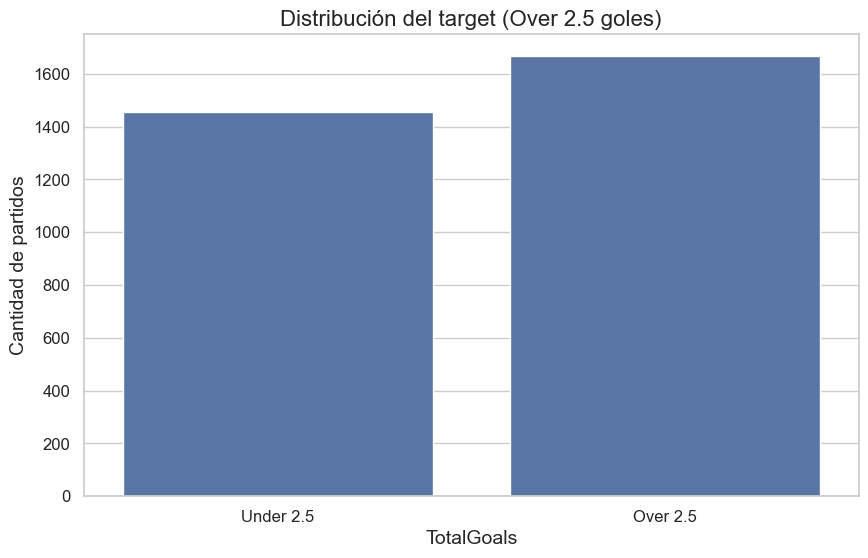

In [448]:
# Conteo de partidos con y sin más de 2.5 goles

sns.countplot(x="TotalGoals", data=train_set)
plt.title("Distribución del target (Over 2.5 goles)")
plt.ylabel("Cantidad de partidos")
plt.xticks([0, 1], ["Under 2.5", "Over 2.5"])
plt.show()

In [449]:
train_set.TotalGoals.value_counts(True)

TotalGoals
1    0.533974
0    0.466026
Name: proportion, dtype: float64

##### **Distribución del target**

La variable objetivo `TotalGoals` ha sido transformada a formato binario para indicar si un partido ha terminado con **más de 2.5 goles** (`1`) o no (`0`). Al analizar su distribución, observamos que el conjunto de datos está **razonablemente equilibrado**:

- Aproximadamente un **53.4%** de los partidos terminaron con más de 2.5 goles.
- El restante **46.6%** fueron partidos con 2 o menos goles.

Esta proporción indica que **no es necesario** aplicar técnicas de balanceo de clases, ya que no existe un desbalance significativo entre ambas categorías. Esta distribución equilibrada favorece el entrenamiento de modelos de clasificación sin necesidad de ajustes adicionales.

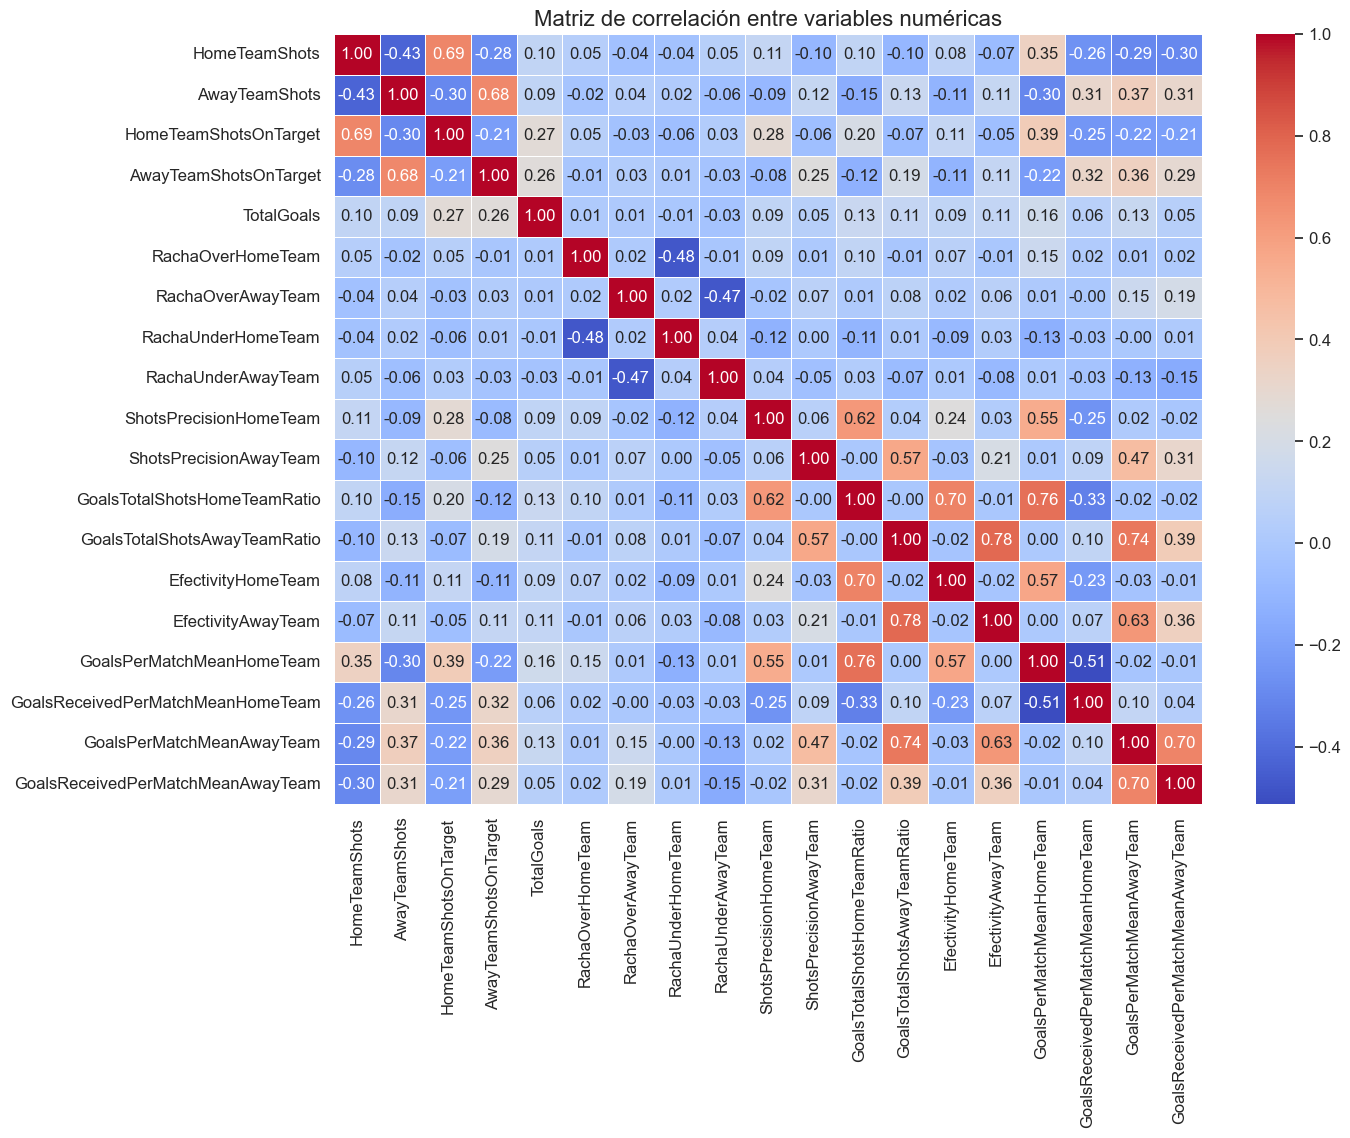

In [450]:
# Seleccionamos solo las columnas numéricas
numeric_features = train_set.select_dtypes(include=["float64", "int64"])
corr_matrix = numeric_features.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

In [451]:
train_set.corr()["TotalGoals"].sort_values(ascending=False)

TotalGoals                           1.000000
HomeTeamShotsOnTarget                0.272819
AwayTeamShotsOnTarget                0.256701
GoalsPerMatchMeanHomeTeam            0.164578
GoalsTotalShotsHomeTeamRatio         0.132584
GoalsPerMatchMeanAwayTeam            0.128104
GoalsTotalShotsAwayTeamRatio         0.112411
EfectivityAwayTeam                   0.106528
HomeTeamShots                        0.098836
ShotsPrecisionHomeTeam               0.091830
EfectivityHomeTeam                   0.091282
AwayTeamShots                        0.091019
GoalsReceivedPerMatchMeanHomeTeam    0.058088
GoalsReceivedPerMatchMeanAwayTeam    0.054495
ShotsPrecisionAwayTeam               0.050960
RachaOverHomeTeam                    0.013864
RachaOverAwayTeam                    0.008561
RachaUnderHomeTeam                  -0.009987
RachaUnderAwayTeam                  -0.031791
Name: TotalGoals, dtype: float64

##### **Análisis de correlación con el target**

Al analizar la matriz de correlación, se observa que las variables más relacionadas con la probabilidad de que un partido termine con más de 2.5 goles (`TotalGoals = 1`) son:

- `HomeTeamShotsOnTarget` y `AwayTeamShotsOnTarget`, que presentan correlaciones de 0.27 y 0.26 respectivamente. Estas variables reflejan la capacidad ofensiva de los equipos.

Por otro lado, las rachas de partidos con over o under 2.5 goles muestran una correlación baja con el target de forma individual, lo cual sugiere que podrían tener un efecto más relevante cuando se combinan con otras variables o en modelos no lineales como los basados en árboles.

En conjunto, los resultados del análisis de correlación respaldan la utilidad de las variables relacionadas con la **efectividad ofensiva** como posibles predictores clave del objetivo.

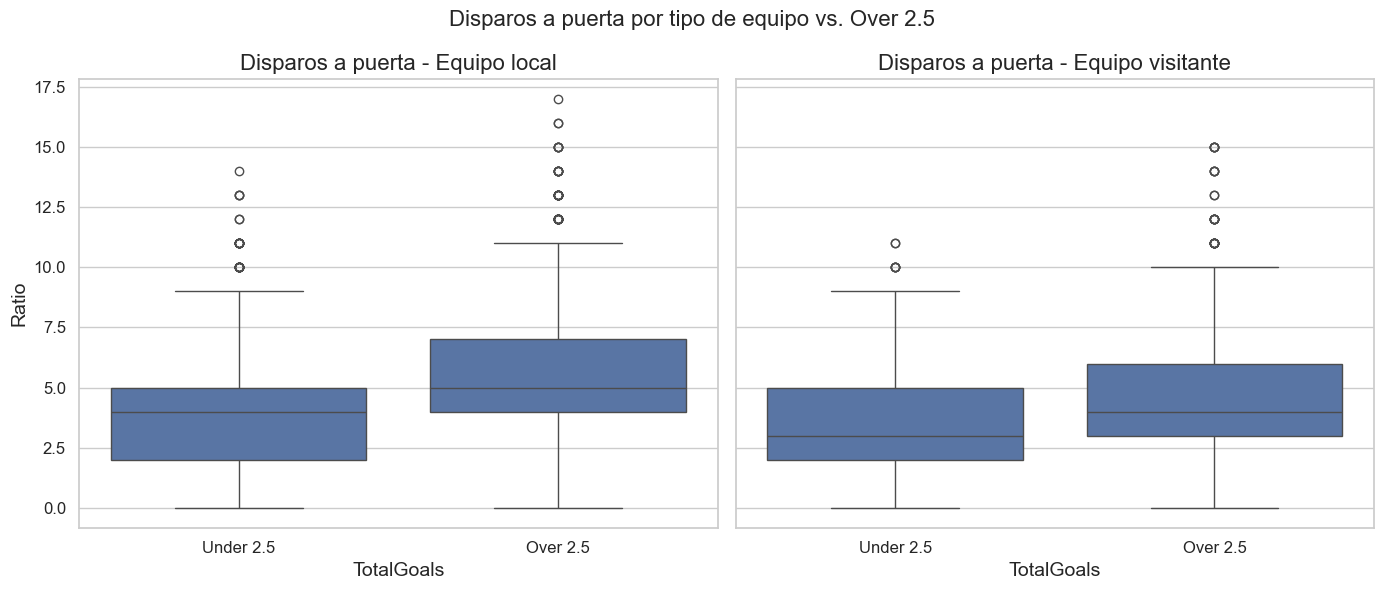

In [452]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.boxplot(ax=axes[0], x="TotalGoals", y="HomeTeamShotsOnTarget", data=train_set)
axes[0].set_title("Disparos a puerta - Equipo local")
axes[0].set_xlabel("TotalGoals")
axes[0].set_ylabel("Ratio")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Under 2.5", "Over 2.5"])

sns.boxplot(ax=axes[1], x="TotalGoals", y="AwayTeamShotsOnTarget", data=train_set)
axes[1].set_title("Disparos a puerta - Equipo visitante")
axes[1].set_xlabel("TotalGoals")
axes[1].set_ylabel("")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Under 2.5", "Over 2.5"])

plt.suptitle("Disparos a puerta por tipo de equipo vs. Over 2.5", fontsize=16)
plt.tight_layout()
plt.show()


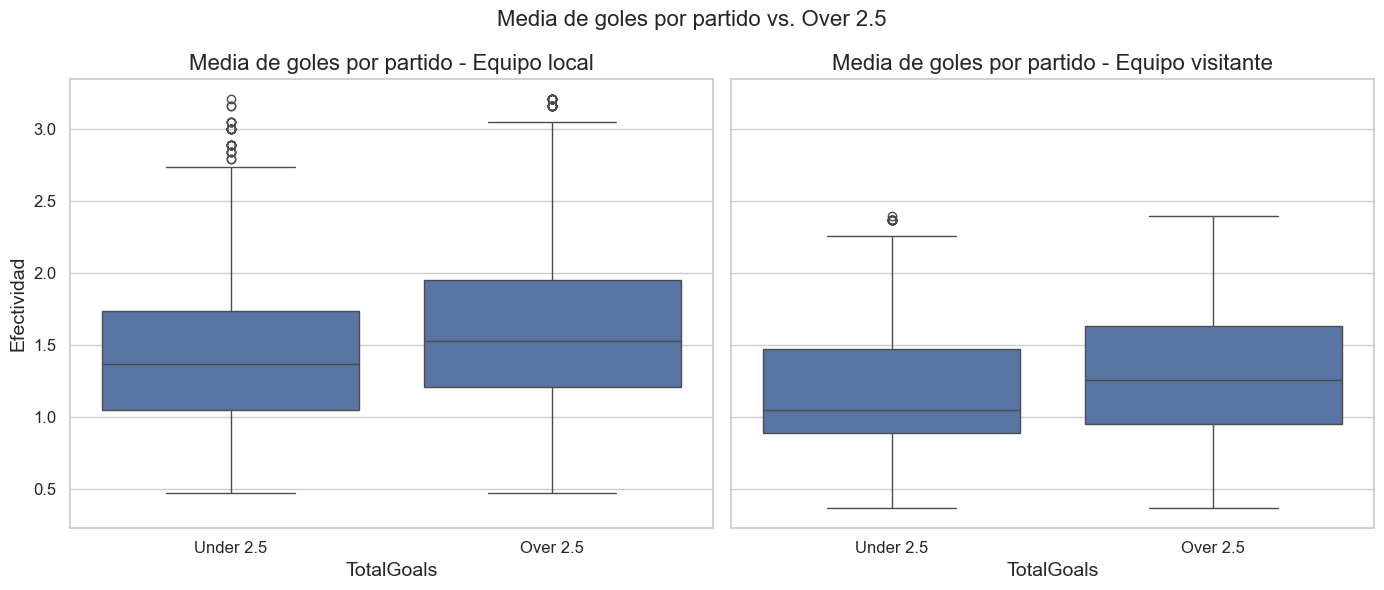

In [453]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.boxplot(ax=axes[0], x="TotalGoals", y="GoalsPerMatchMeanHomeTeam", data=train_set)
axes[0].set_title("Media de goles por partido - Equipo local")
axes[0].set_xlabel("TotalGoals")
axes[0].set_ylabel("Efectividad")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Under 2.5", "Over 2.5"])

sns.boxplot(ax=axes[1], x="TotalGoals", y="GoalsPerMatchMeanAwayTeam", data=train_set)
axes[1].set_title("Media de goles por partido - Equipo visitante")
axes[1].set_xlabel("TotalGoals")
axes[1].set_ylabel("")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Under 2.5", "Over 2.5"])

plt.suptitle("Media de goles por partido vs. Over 2.5", fontsize=16)
plt.tight_layout()
plt.show()

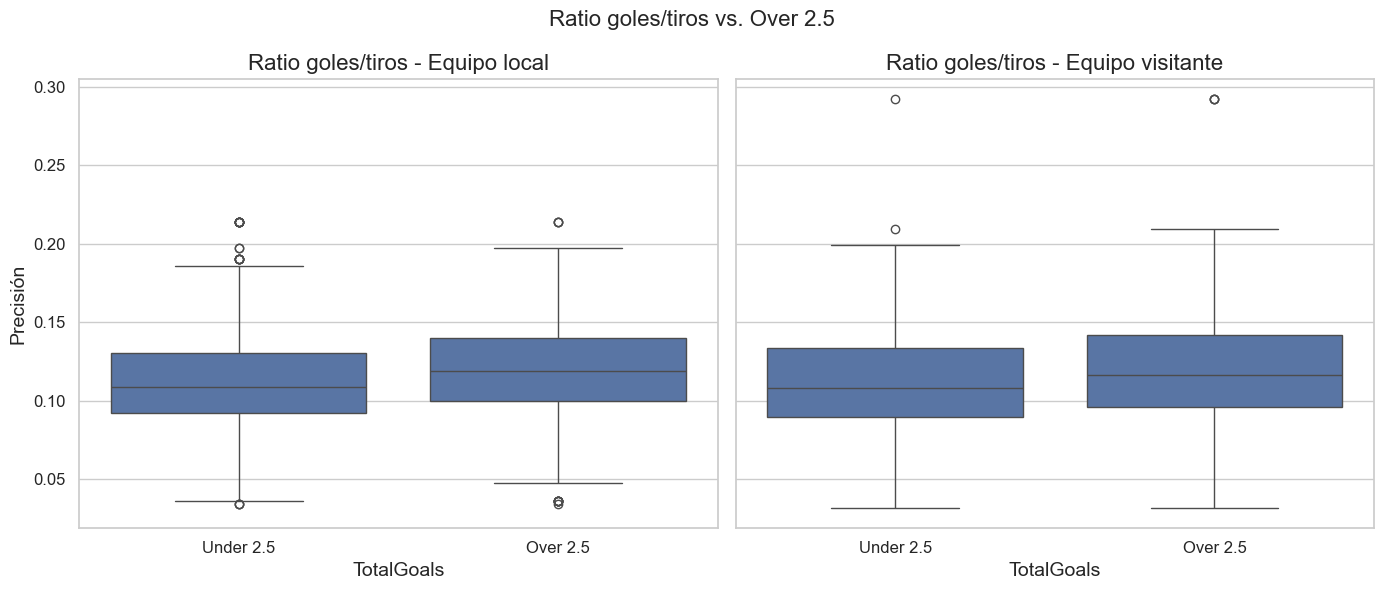

In [454]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.boxplot(ax=axes[0], x="TotalGoals", y="GoalsTotalShotsHomeTeamRatio", data=train_set)
axes[0].set_title("Ratio goles/tiros - Equipo local")
axes[0].set_xlabel("TotalGoals")
axes[0].set_ylabel("Precisión")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Under 2.5", "Over 2.5"])

sns.boxplot(ax=axes[1], x="TotalGoals", y="GoalsTotalShotsAwayTeamRatio", data=train_set)
axes[1].set_title("Ratio goles/tiros - Equipo visitante")
axes[1].set_xlabel("TotalGoals")
axes[1].set_ylabel("")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Under 2.5", "Over 2.5"])

plt.suptitle("Ratio goles/tiros vs. Over 2.5", fontsize=16)
plt.tight_layout()
plt.show()

##### **Comparativa de métricas ofensivas por equipo vs. Over 2.5**

Se han comparado tres métricas clave de rendimiento ofensivo entre partidos que terminaron con más de 2.5 goles y aquellos que no.


#### 1. Disparos a puerta
- Se observa una **clara diferencia en la mediana**: los equipos (locales y visitantes) que participan en partidos con Over 2.5 suelen tener **más disparos a puerta**.
- Esto refuerza la lógica de que una mayor capacidad ofensiva se asocia a encuentros con mayor cantidad de goles.


#### 2. Media de goles por partido (calculada por equipo y temporada)
- Esta variable también muestra una diferencia importante: tanto equipos locales como visitantes presentan una media de goles superior cuando el partido termina en Over 2.5.
- Confirma que el rendimiento ofensivo global del equipo es un buen indicador previo para la predicción.


#### 3. Ratio goles/tiros totales
- Aunque la separación no es tan marcada como en los gráficos anteriores, se aprecia una **ligera mejora en el ratio** para los partidos Over 2.5.
- Esto sugiere que la **efectividad ofensiva** puede ser un factor adicional relevante.


#### Conclusión:
Las tres métricas analizadas reflejan una tendencia clara: **los partidos con más de 2.5 goles están asociados a mejores valores ofensivos** por parte de los equipos implicados, tanto en términos de volumen (disparos) como de eficacia (goles y ratios).

Este análisis justifica plenamente su inclusión como variables relevantes en el entrenamiento del modelo predictivo.

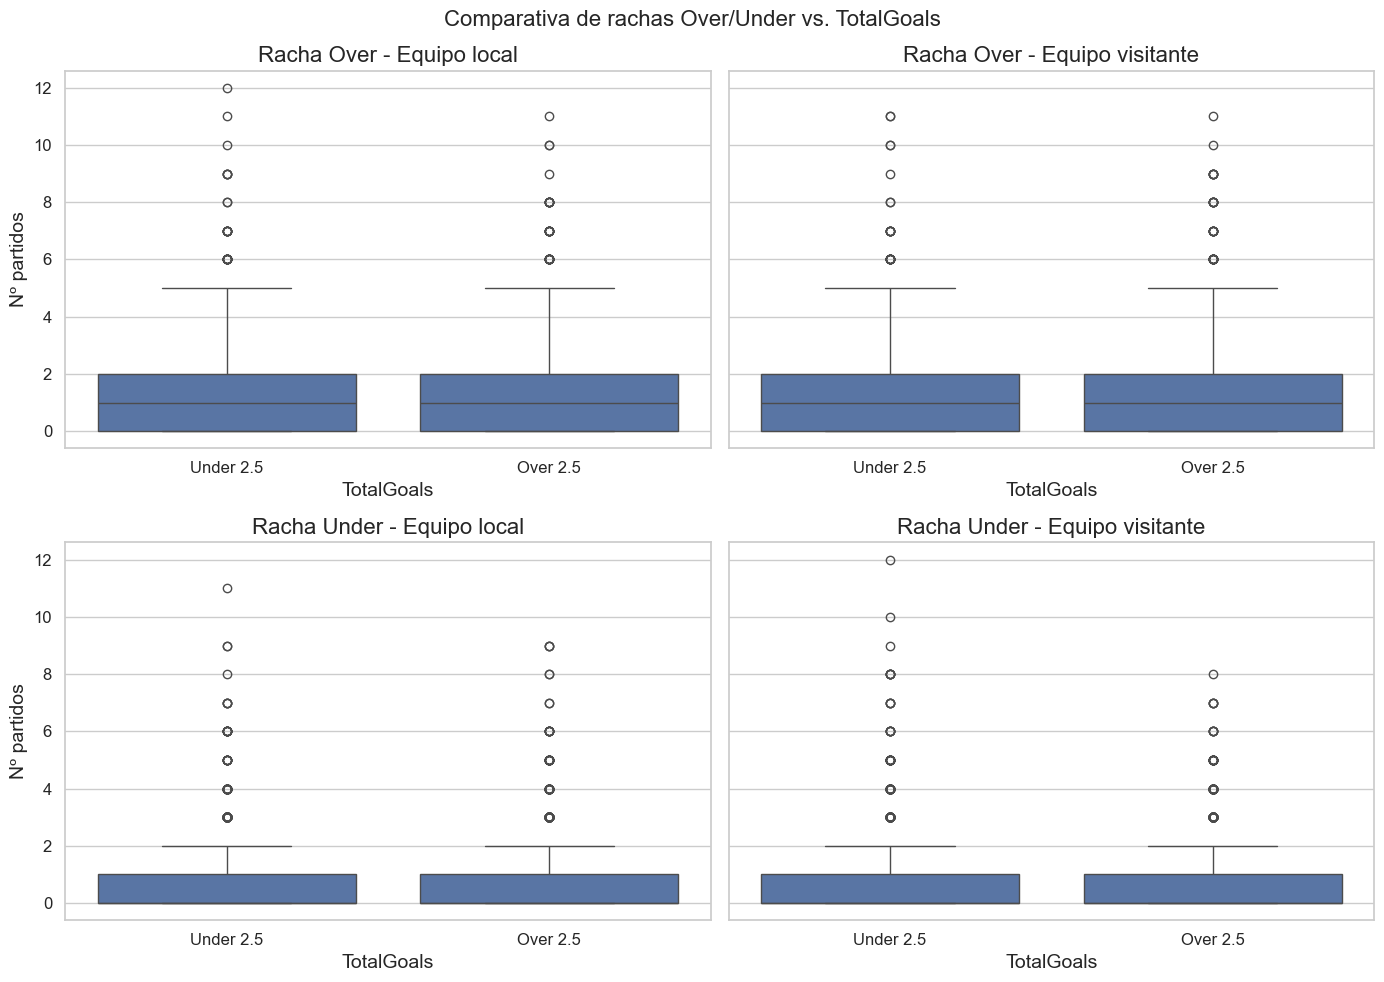

In [455]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

# Racha de partidos con Over 2.5
sns.boxplot(ax=axes[0, 0], x="TotalGoals", y="RachaOverHomeTeam", data=train_set)
axes[0, 0].set_title("Racha Over - Equipo local")
axes[0, 0].set_xlabel("TotalGoals")
axes[0, 0].set_ylabel("Nº partidos")
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(["Under 2.5", "Over 2.5"])

sns.boxplot(ax=axes[0, 1], x="TotalGoals", y="RachaOverAwayTeam", data=train_set)
axes[0, 1].set_title("Racha Over - Equipo visitante")
axes[0, 1].set_xlabel("TotalGoals")
axes[0, 1].set_ylabel("")
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(["Under 2.5", "Over 2.5"])

# Racha de partidos con Under 2.5
sns.boxplot(ax=axes[1, 0], x="TotalGoals", y="RachaUnderHomeTeam", data=train_set)
axes[1, 0].set_title("Racha Under - Equipo local")
axes[1, 0].set_xlabel("TotalGoals")
axes[1, 0].set_ylabel("Nº partidos")
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(["Under 2.5", "Over 2.5"])

sns.boxplot(ax=axes[1, 1], x="TotalGoals", y="RachaUnderAwayTeam", data=train_set)
axes[1, 1].set_title("Racha Under - Equipo visitante")
axes[1, 1].set_xlabel("TotalGoals")
axes[1, 1].set_ylabel("")
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(["Under 2.5", "Over 2.5"])

plt.suptitle("Comparativa de rachas Over/Under vs. TotalGoals", fontsize=16)
plt.tight_layout()
plt.show()


##### **Análisis de rachas Over/Under por tipo de equipo**

En estos gráficos se analiza si existe relación entre las rachas recientes de partidos con Over y Under 2.5 goles (tanto del equipo local como del visitante) y el resultado final del encuentro (`TotalGoals`).

A diferencia de otras variables ofensivas como la efectividad o la precisión, las rachas **no muestran una diferencia visual clara** entre partidos que terminaron con más o menos de 2.5 goles.

Las distribuciones son prácticamente iguales para ambas clases del target, lo que sugiere que, de forma aislada, estas variables **tienen poca capacidad predictiva**, al menos por sí solas. Por tanto, se procede a combinar las rachas para tener una visión del "momento ofensivo o defensivo" global del partido.

In [456]:
train_set["RachaTotalOver"] = train_set["RachaOverHomeTeam"] + train_set["RachaOverAwayTeam"]
train_set["RachaTotalUnder"] = train_set["RachaUnderHomeTeam"] + train_set["RachaUnderAwayTeam"]

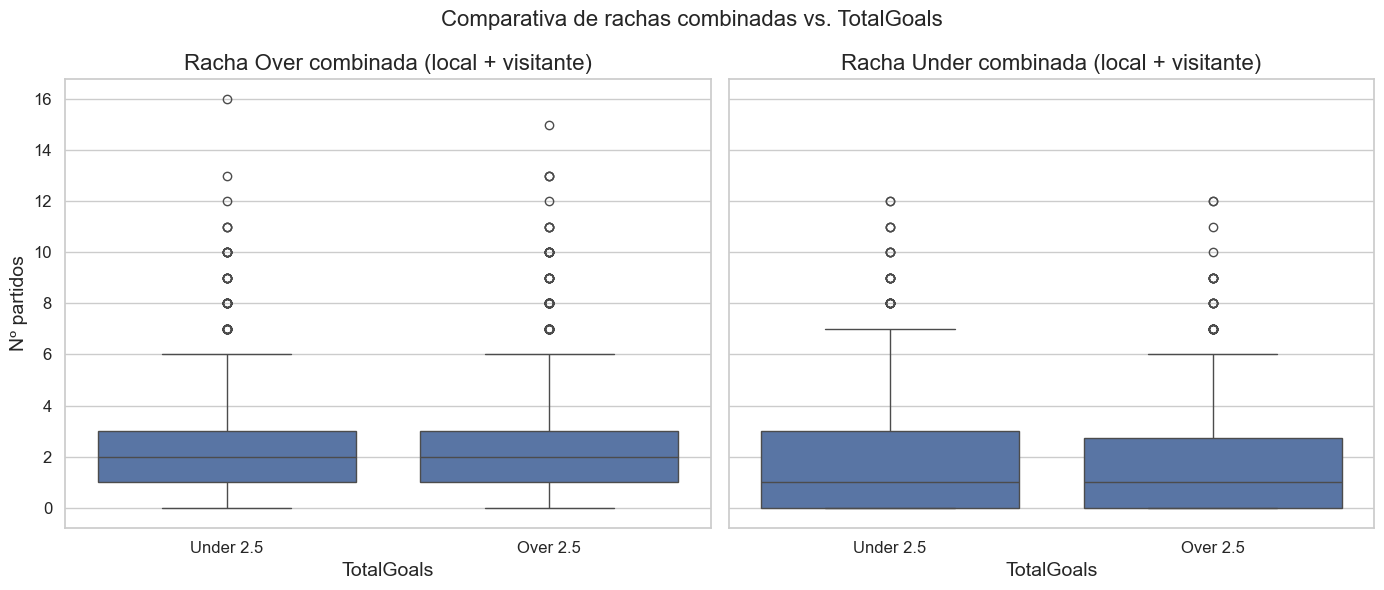

In [457]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Boxplot Racha Over combinada
sns.boxplot(ax=axes[0], x="TotalGoals", y="RachaTotalOver", data=train_set)
axes[0].set_title("Racha Over combinada (local + visitante)")
axes[0].set_xlabel("TotalGoals")
axes[0].set_ylabel("Nº partidos")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Under 2.5", "Over 2.5"])

# Boxplot Racha Under combinada
sns.boxplot(ax=axes[1], x="TotalGoals", y="RachaTotalUnder", data=train_set)
axes[1].set_title("Racha Under combinada (local + visitante)")
axes[1].set_xlabel("TotalGoals")
axes[1].set_ylabel("")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Under 2.5", "Over 2.5"])

plt.suptitle("Comparativa de rachas combinadas vs. TotalGoals", fontsize=16)
plt.tight_layout()
plt.show()


##### **Evaluación de rachas combinadas como variables predictoras**

Al generar las variables combinadas (`RachaTotalOver` y `RachaTotalUnder`) sumando las rachas individuales del equipo local y visitante, con el objetivo de identificar si el contexto ofensivo o defensivo reciente podía estar asociado a la probabilidad de que el partido finalice con más de 2.5 goles, los gráficos muestran que ambas variables presentan **distribuciones prácticamente idénticas** entre partidos Over y Under 2.5 goles. No hay diferencias significativas ni tendencias claras que indiquen valor predictivo.

Con base en este análisis, se concluye que **las rachas combinadas tampoco aportan información relevante**, por lo que se optará por **excluirlas del conjunto final de variables** para el modelo.

In [458]:
X_train = train_set.drop(columns=["TotalGoals", "RachaOverHomeTeam", "RachaOverAwayTeam", "RachaUnderHomeTeam", "RachaUnderAwayTeam", "RachaTotalOver", "RachaTotalUnder"])
y_train = train_set["TotalGoals"]

In [459]:
X_test = test_set.drop(columns=["TotalGoals", "RachaOverHomeTeam", "RachaOverAwayTeam", "RachaUnderHomeTeam", "RachaUnderAwayTeam"])
y_test = test_set["TotalGoals"]

In [460]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3120 entries, 8227 to 11154
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   HomeTeamShots                      3120 non-null   float64
 1   AwayTeamShots                      3120 non-null   float64
 2   HomeTeamShotsOnTarget              3120 non-null   float64
 3   AwayTeamShotsOnTarget              3120 non-null   float64
 4   ShotsPrecisionHomeTeam             3120 non-null   float64
 5   ShotsPrecisionAwayTeam             3120 non-null   float64
 6   GoalsTotalShotsHomeTeamRatio       3120 non-null   float64
 7   GoalsTotalShotsAwayTeamRatio       3120 non-null   float64
 8   EfectivityHomeTeam                 3120 non-null   float64
 9   EfectivityAwayTeam                 3120 non-null   float64
 10  GoalsPerMatchMeanHomeTeam          3120 non-null   float64
 11  GoalsReceivedPerMatchMeanHomeTeam  3120 non-null   float6

In [461]:
X_train

,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,ShotsPrecisionHomeTeam,ShotsPrecisionAwayTeam,GoalsTotalShotsHomeTeamRatio,GoalsTotalShotsAwayTeamRatio,EfectivityHomeTeam,EfectivityAwayTeam,GoalsPerMatchMeanHomeTeam,GoalsReceivedPerMatchMeanHomeTeam,GoalsPerMatchMeanAwayTeam,GoalsReceivedPerMatchMeanAwayTeam
8227,21.0,4.0,7.0,1.0,0.346757,0.303417,0.132821,0.071034,0.393844,0.231085,1.95,0.68,1.00,1.32
10571,16.0,16.0,8.0,6.0,0.344752,0.335437,0.123282,0.117141,0.303902,0.338936,1.37,1.74,1.58,1.68
9802,15.0,16.0,8.0,5.0,0.311340,0.298343,0.106051,0.081602,0.380388,0.313283,1.58,1.11,1.26,2.05
11463,20.0,8.0,8.0,2.0,0.378226,0.362414,0.158624,0.115449,0.420389,0.299427,2.58,1.16,1.16,1.00
10751,9.0,6.0,5.0,2.0,0.384509,0.414660,0.127752,0.111600,0.396199,0.254386,1.53,1.53,1.21,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,17.0,22.0,9.0,7.0,0.358494,0.344027,0.134767,0.097390,0.423220,0.244958,2.05,0.84,1.05,2.21
9274,18.0,7.0,3.0,1.0,0.337272,0.282544,0.097113,0.059781,0.227216,0.232957,0.89,1.26,0.53,1.11
8840,22.0,9.0,7.0,4.0,0.340858,0.330238,0.126020,0.079388,0.400501,0.169549,1.84,1.53,0.68,0.84
11487,12.0,14.0,6.0,5.0,0.317537,0.324897,0.087287,0.119355,0.261532,0.353801,1.00,3.00,1.37,1.63


In [462]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

y_train shape: (3120,)
y_test shape: (780,)
X_train shape: (3120, 14)
X_test shape: (780, 14)


### **ENTRENAR MODELOS**
En esta sección se entrenarán varios modelos de clasificación con el objetivo de **predecir si un partido de la Premier League terminará con más de 2.5 goles** o no. Para ello, se utilizarán las variables generadas previamente durante el proceso de análisis y *feature engineering*.

Se han seleccionado cuatro algoritmos:

- **Random Forest**
- **Gradient Boosting**
- **LightGBM**
- **XGBoost**

Todos los modelos serán entrenados sobre el mismo conjunto de entrenamiento y evaluados con el mismo conjunto de test, utilizando métricas clave como:

- Precisión, recall y F1-score por clase (`0` y `1`)
- Accuracy general
- Promedios macro y ponderados de las métricas

Los resultados obtenidos se almacenarán en un diccionario estructurado para su posterior conversión a un DataFrame, lo que permitirá comparar fácilmente el rendimiento entre modelos y seleccionar el más adecuado para el problema planteado.

> En esta primera parte, se utilizará la versión base de cada modelo, sin ajuste de hiperparámetros.

In [463]:
results = {
    "Model": [],
    "Precision_0": [],
    "Precision_1": [],
    "Recall_0": [],
    "Recall_1": [],
    "f1_0": [],
    "f1_1": [],
    "Accuracy": [],
    "Macro_Prec": [],
    "Macro_Recall": [],
    "Macro_f1": [],
    "Weighted_Prec": [],
    "Weighted_Recall": [],
    "Weighted_f1": []
}

##### BASELINE RANDOM FOREST

In [464]:
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)
predict = rf_base.predict(X_test)

model_name = rf_base.__class__.__name__

report_dict = classification_report(y_test, predict, output_dict=True)

results["Model"].append(model_name)
results["Precision_0"].append(report_dict["0"]["precision"])
results["Precision_1"].append(report_dict["1"]["precision"])
results["Recall_0"].append(report_dict["0"]["recall"])
results["Recall_1"].append(report_dict["1"]["recall"])
results["f1_0"].append(report_dict["0"]["f1-score"])
results["f1_1"].append(report_dict["1"]["f1-score"])
results["Accuracy"].append(report_dict["accuracy"])
results["Macro_Prec"].append(report_dict["macro avg"]["precision"])
results["Macro_Recall"].append(report_dict["macro avg"]["recall"])
results["Macro_f1"].append(report_dict["macro avg"]["f1-score"])
results["Weighted_Prec"].append(report_dict["weighted avg"]["precision"])
results["Weighted_Recall"].append(report_dict["weighted avg"]["recall"])
results["Weighted_f1"].append(report_dict["weighted avg"]["f1-score"])

##### BASELINE GRADIENT BOOSTING

In [465]:
gb_base = GradientBoostingClassifier(random_state=42)
gb_base.fit(X_train, y_train)
predict = gb_base.predict(X_test)

model_name = gb_base.__class__.__name__

report_dict = classification_report(y_test, predict, output_dict=True)

results["Model"].append(model_name)
results["Precision_0"].append(report_dict["0"]["precision"])
results["Precision_1"].append(report_dict["1"]["precision"])
results["Recall_0"].append(report_dict["0"]["recall"])
results["Recall_1"].append(report_dict["1"]["recall"])
results["f1_0"].append(report_dict["0"]["f1-score"])
results["f1_1"].append(report_dict["1"]["f1-score"])
results["Accuracy"].append(report_dict["accuracy"])
results["Macro_Prec"].append(report_dict["macro avg"]["precision"])
results["Macro_Recall"].append(report_dict["macro avg"]["recall"])
results["Macro_f1"].append(report_dict["macro avg"]["f1-score"])
results["Weighted_Prec"].append(report_dict["weighted avg"]["precision"])
results["Weighted_Recall"].append(report_dict["weighted avg"]["recall"])
results["Weighted_f1"].append(report_dict["weighted avg"]["f1-score"])

##### BASELINE LIGHT GBM

In [466]:
lgbm_base = LGBMClassifier(random_state=42)
lgbm_base.fit(X_train, y_train)
predict = lgbm_base.predict(X_test)

model_name = lgbm_base.__class__.__name__

report_dict = classification_report(y_test, predict, output_dict=True)

results["Model"].append(model_name)
results["Precision_0"].append(report_dict["0"]["precision"])
results["Precision_1"].append(report_dict["1"]["precision"])
results["Recall_0"].append(report_dict["0"]["recall"])
results["Recall_1"].append(report_dict["1"]["recall"])
results["f1_0"].append(report_dict["0"]["f1-score"])
results["f1_1"].append(report_dict["1"]["f1-score"])
results["Accuracy"].append(report_dict["accuracy"])
results["Macro_Prec"].append(report_dict["macro avg"]["precision"])
results["Macro_Recall"].append(report_dict["macro avg"]["recall"])
results["Macro_f1"].append(report_dict["macro avg"]["f1-score"])
results["Weighted_Prec"].append(report_dict["weighted avg"]["precision"])
results["Weighted_Recall"].append(report_dict["weighted avg"]["recall"])
results["Weighted_f1"].append(report_dict["weighted avg"]["f1-score"])

[LightGBM] [Info] Number of positive: 1666, number of negative: 1454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1608
[LightGBM] [Info] Number of data points in the train set: 3120, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.533974 -> initscore=0.136107
[LightGBM] [Info] Start training from score 0.136107


##### BASELINE XGBOOST

In [467]:
xgb_base = XGBRFClassifier(random_state=42)
xgb_base.fit(X_train, y_train)
predict = xgb_base.predict(X_test)

model_name = xgb_base.__class__.__name__

report_dict = classification_report(y_test, predict, output_dict=True)

results["Model"].append(model_name)
results["Precision_0"].append(report_dict["0"]["precision"])
results["Precision_1"].append(report_dict["1"]["precision"])
results["Recall_0"].append(report_dict["0"]["recall"])
results["Recall_1"].append(report_dict["1"]["recall"])
results["f1_0"].append(report_dict["0"]["f1-score"])
results["f1_1"].append(report_dict["1"]["f1-score"])
results["Accuracy"].append(report_dict["accuracy"])
results["Macro_Prec"].append(report_dict["macro avg"]["precision"])
results["Macro_Recall"].append(report_dict["macro avg"]["recall"])
results["Macro_f1"].append(report_dict["macro avg"]["f1-score"])
results["Weighted_Prec"].append(report_dict["weighted avg"]["precision"])
results["Weighted_Recall"].append(report_dict["weighted avg"]["recall"])
results["Weighted_f1"].append(report_dict["weighted avg"]["f1-score"])

##### SCORES BASELINE

In [468]:
df_scores_baseline = pd.DataFrame(results)
df_scores_baseline[df_scores_baseline.select_dtypes(include=['float']).columns] = df_scores_baseline.select_dtypes(include=['float']).round(2)

In [469]:
df_scores_baseline

,Model,Precision_0,Precision_1,Recall_0,Recall_1,f1_0,f1_1,Accuracy,Macro_Prec,Macro_Recall,Macro_f1,Weighted_Prec,Weighted_Recall,Weighted_f1
0,RandomForestClassifier,0.64,0.68,0.63,0.69,0.64,0.69,0.66,0.66,0.66,0.66,0.66,0.66,0.66
1,GradientBoostingClassifier,0.66,0.69,0.63,0.72,0.65,0.71,0.68,0.68,0.68,0.68,0.68,0.68,0.68
2,LGBMClassifier,0.64,0.68,0.62,0.69,0.63,0.68,0.66,0.66,0.66,0.66,0.66,0.66,0.66
3,XGBRFClassifier,0.64,0.67,0.60,0.71,0.62,0.69,0.66,0.66,0.66,0.66,0.66,0.66,0.66


### MODELOS MEJORADOS

#### **Métrica objetivo: F1-score de clase 1**

El objetivo del modelo es **detectar correctamente aquellos partidos que tendrán más de 2.5 goles**, minimizando los fallos cuando se predice Over (clase 1).

Por este motivo, se da especial importancia al:

- **F1-score de la clase 1**, que equilibra:
    - La capacidad de detectar partidos Over (recall)
    - Y la fiabilidad de esas predicciones (precision)

Esto es especialmente relevante en el contexto de apuestas, donde cada predicción positiva representa una apuesta que se realiza y por tanto debe estar lo mejor fundamentada posible.

In [470]:
results = {
    "Model": [],
    "Precision_0": [],
    "Precision_1": [],
    "Recall_0": [],
    "Recall_1": [],
    "f1_0": [],
    "f1_1": [],
    "Accuracy": [],
    "Macro_Prec": [],
    "Macro_Recall": [],
    "Macro_f1": [],
    "Weighted_Prec": [],
    "Weighted_Recall": [],
    "Weighted_f1": []
}

In [471]:
best_estimators = {}

In [472]:
scoring_metric = make_scorer(f1_score, pos_label=1)  # Cambiar a recall_score o precision_score si es necesario

##### RANDOM FOREST OPTUNA

In [473]:
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 900, 1500, step=25)
    max_depth = trial.suggest_int('max_depth', 15, 30, step=1)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20, step=2)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 10, 20, step=1)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )
    
    
    score = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring_metric).mean()
    return score

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=30)
rf_optuna = RandomForestClassifier(**study_rf.best_params, random_state=42)

rf_optuna.fit(X_train, y_train)
predict = rf_optuna.predict(X_test)

best_estimators[rf_optuna.__class__.__name__] = rf_optuna

report_dict = classification_report(y_test, predict, output_dict=True)

results["Model"].append(rf_optuna.__class__.__name__)
results["Precision_0"].append(report_dict["0"]["precision"])
results["Precision_1"].append(report_dict["1"]["precision"])
results["Recall_0"].append(report_dict["0"]["recall"])
results["Recall_1"].append(report_dict["1"]["recall"])
results["f1_0"].append(report_dict["0"]["f1-score"])
results["f1_1"].append(report_dict["1"]["f1-score"])
results["Accuracy"].append(report_dict["accuracy"])
results["Macro_Prec"].append(report_dict["macro avg"]["precision"])
results["Macro_Recall"].append(report_dict["macro avg"]["recall"])
results["Macro_f1"].append(report_dict["macro avg"]["f1-score"])
results["Weighted_Prec"].append(report_dict["weighted avg"]["precision"])
results["Weighted_Recall"].append(report_dict["weighted avg"]["recall"])
results["Weighted_f1"].append(report_dict["weighted avg"]["f1-score"])

[I 2025-04-01 22:00:23,346] A new study created in memory with name: no-name-27c95ba6-b8af-4130-ac4d-75f94edc4a78


[I 2025-04-01 22:00:32,295] Trial 0 finished with value: 0.6984069254285534 and parameters: {'n_estimators': 1225, 'max_depth': 22, 'min_samples_split': 6, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6984069254285534.
[I 2025-04-01 22:00:40,104] Trial 1 finished with value: 0.7007961391184228 and parameters: {'n_estimators': 1050, 'max_depth': 23, 'min_samples_split': 18, 'min_samples_leaf': 19, 'max_features': 'log2'}. Best is trial 1 with value: 0.7007961391184228.
[I 2025-04-01 22:00:48,094] Trial 2 finished with value: 0.6989476821412763 and parameters: {'n_estimators': 1075, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 18, 'max_features': 'log2'}. Best is trial 1 with value: 0.7007961391184228.
[I 2025-04-01 22:00:57,554] Trial 3 finished with value: 0.6996726435992944 and parameters: {'n_estimators': 1250, 'max_depth': 27, 'min_samples_split': 14, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.700

##### GRADIENT BOOSTING OPTUNA

In [474]:
def objective_gb(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.05, step=0.001)
    n_estimators = trial.suggest_int('n_estimators', 500, 800, step=25)  # Evita valores excesivos
    max_depth = trial.suggest_int('max_depth', 3, 12, step=1)  # Evita sobreajuste con valores bajos
    min_samples_split = trial.suggest_int('min_samples_split', 5, 20, step=1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, step=1)
    subsample = trial.suggest_float('subsample', 0.6, 0.9, step=0.05)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    model = GradientBoostingClassifier(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        max_features=max_features,
        random_state=42
    )
    

    score = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring_metric).mean()
    return score

study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective_gb, n_trials=30)
gb_optuna = GradientBoostingClassifier(**study_gb.best_params, random_state=42)

gb_optuna.fit(X_train, y_train)
predict = gb_optuna.predict(X_test)

best_estimators[gb_optuna.__class__.__name__] = gb_optuna

report_dict = classification_report(y_test, predict, output_dict=True)

results["Model"].append(gb_optuna.__class__.__name__)
results["Precision_0"].append(report_dict["0"]["precision"])
results["Precision_1"].append(report_dict["1"]["precision"])
results["Recall_0"].append(report_dict["0"]["recall"])
results["Recall_1"].append(report_dict["1"]["recall"])
results["f1_0"].append(report_dict["0"]["f1-score"])
results["f1_1"].append(report_dict["1"]["f1-score"])
results["Accuracy"].append(report_dict["accuracy"])
results["Macro_Prec"].append(report_dict["macro avg"]["precision"])
results["Macro_Recall"].append(report_dict["macro avg"]["recall"])
results["Macro_f1"].append(report_dict["macro avg"]["f1-score"])
results["Weighted_Prec"].append(report_dict["weighted avg"]["precision"])
results["Weighted_Recall"].append(report_dict["weighted avg"]["recall"])
results["Weighted_f1"].append(report_dict["weighted avg"]["f1-score"])

[I 2025-04-01 22:09:22,010] A new study created in memory with name: no-name-f7c78f72-6f4d-4f52-8de3-631f21d31b5e
[I 2025-04-01 22:09:37,687] Trial 0 finished with value: 0.6848574255297689 and parameters: {'learning_rate': 0.027000000000000003, 'n_estimators': 625, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 5, 'subsample': 0.9, 'max_features': 'log2'}. Best is trial 0 with value: 0.6848574255297689.
[I 2025-04-01 22:09:48,655] Trial 1 finished with value: 0.690517607949177 and parameters: {'learning_rate': 0.043000000000000003, 'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 20, 'min_samples_leaf': 8, 'subsample': 0.65, 'max_features': None}. Best is trial 1 with value: 0.690517607949177.
[I 2025-04-01 22:10:03,777] Trial 2 finished with value: 0.6993314797653042 and parameters: {'learning_rate': 0.015, 'n_estimators': 500, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 9, 'subsample': 0.85, 'max_features': 'log2'}. Best is trial 2 with value: 

##### LIGHT GBM OPTUNA

In [ ]:
def objective_lgbm(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.005, 0.05, step=0.001)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=50)
    max_depth = trial.suggest_int('max_depth', 3, 15, step=1)
    num_leaves = trial.suggest_int('num_leaves', 50, 300, step=10)
    min_child_samples = trial.suggest_int('min_child_samples', 1, 30, step=2)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0, step=0.05)
    subsample = trial.suggest_float('subsample', 0.6, 0.9, step=0.05)
    reg_alpha = trial.suggest_float('reg_alpha', 0.0, 10.0, step=0.1)
    reg_lambda = trial.suggest_float('reg_lambda', 0.0, 10.0, step=0.1)

    model = LGBMClassifier(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        num_leaves=num_leaves,
        min_child_samples=min_child_samples,
        colsample_bytree=colsample_bytree,
        subsample=subsample,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1,
        verbose=0
    )
    
    score = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring_metric).mean()
    return score

study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=30)
lgbm_optuna = LGBMClassifier(**study_lgbm.best_params, random_state=42)

lgbm_optuna.fit(X_train, y_train)
predict = lgbm_optuna.predict(X_test)

best_estimators[lgbm_optuna.__class__.__name__] = lgbm_optuna

report_dict = classification_report(y_test, predict, output_dict=True)

results["Model"].append(lgbm_optuna.__class__.__name__)
results["Precision_0"].append(report_dict["0"]["precision"])
results["Precision_1"].append(report_dict["1"]["precision"])
results["Recall_0"].append(report_dict["0"]["recall"])
results["Recall_1"].append(report_dict["1"]["recall"])
results["f1_0"].append(report_dict["0"]["f1-score"])
results["f1_1"].append(report_dict["1"]["f1-score"])
results["Accuracy"].append(report_dict["accuracy"])
results["Macro_Prec"].append(report_dict["macro avg"]["precision"])
results["Macro_Recall"].append(report_dict["macro avg"]["recall"])
results["Macro_f1"].append(report_dict["macro avg"]["f1-score"])
results["Weighted_Prec"].append(report_dict["weighted avg"]["precision"])
results["Weighted_Recall"].append(report_dict["weighted avg"]["recall"])
results["Weighted_f1"].append(report_dict["weighted avg"]["f1-score"])

##### XGBOOST OPTUNA

In [476]:
def objective_xgb(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2, step=0.01)
    n_estimators = trial.suggest_int('n_estimators', 100, 800, step=50)
    max_depth = trial.suggest_int('max_depth', 3, 8, step=1)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 6, step=1)
    gamma = trial.suggest_float('gamma', 0.1, 2.0, step=0.1)
    subsample = trial.suggest_float('subsample', 0.6, 1.0, step=0.05)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0, step=0.05)
    reg_alpha = trial.suggest_float('reg_alpha', 0, 5, step=0.1)
    reg_lambda = trial.suggest_float('reg_lambda', 0, 5, step=0.1)

    model = XGBRFClassifier(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )
    
    score = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring_metric).mean()
    return score

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30)
xgb_optuna = XGBRFClassifier(**study_xgb.best_params, random_state=42)
xgb_optuna.fit(X_train, y_train)
predict = xgb_optuna.predict(X_test)

best_estimators[xgb_optuna.__class__.__name__] = xgb_optuna

report_dict = classification_report(y_test, predict, output_dict=True)

results["Model"].append(xgb_optuna.__class__.__name__)
results["Precision_0"].append(report_dict["0"]["precision"])
results["Precision_1"].append(report_dict["1"]["precision"])
results["Recall_0"].append(report_dict["0"]["recall"])
results["Recall_1"].append(report_dict["1"]["recall"])
results["f1_0"].append(report_dict["0"]["f1-score"])
results["f1_1"].append(report_dict["1"]["f1-score"])
results["Accuracy"].append(report_dict["accuracy"])
results["Macro_Prec"].append(report_dict["macro avg"]["precision"])
results["Macro_Recall"].append(report_dict["macro avg"]["recall"])
results["Macro_f1"].append(report_dict["macro avg"]["f1-score"])
results["Weighted_Prec"].append(report_dict["weighted avg"]["precision"])
results["Weighted_Recall"].append(report_dict["weighted avg"]["recall"])
results["Weighted_f1"].append(report_dict["weighted avg"]["f1-score"])

[I 2025-04-01 22:19:38,869] A new study created in memory with name: no-name-94951499-033d-4477-85f7-4f39cb1f611c
[I 2025-04-01 22:19:39,376] Trial 0 finished with value: 0.7095533146484984 and parameters: {'learning_rate': 0.12, 'n_estimators': 100, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 0.8, 'subsample': 0.85, 'colsample_bytree': 0.75, 'reg_alpha': 3.5, 'reg_lambda': 2.6}. Best is trial 0 with value: 0.7095533146484984.
[I 2025-04-01 22:19:41,660] Trial 1 finished with value: 0.696197014417445 and parameters: {'learning_rate': 0.02, 'n_estimators': 550, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 1.1, 'subsample': 0.9, 'colsample_bytree': 0.6, 'reg_alpha': 1.5, 'reg_lambda': 0.2}. Best is trial 0 with value: 0.7095533146484984.
[I 2025-04-01 22:19:42,050] Trial 2 finished with value: 0.696197014417445 and parameters: {'learning_rate': 0.12, 'n_estimators': 200, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 1.1, 'subsample': 0.65, 'colsample_bytree': 0.6, 'reg_alpha': 4

In [477]:
df_results = pd.DataFrame(results)
df_results.loc[:, df_results.select_dtypes(include=['float']).columns] = df_results.select_dtypes(include=['float']).round(2)

In [478]:
df_results

,Model,Precision_0,Precision_1,Recall_0,Recall_1,f1_0,f1_1,Accuracy,Macro_Prec,Macro_Recall,Macro_f1,Weighted_Prec,Weighted_Recall,Weighted_f1
0,RandomForestClassifier,0.65,0.68,0.60,0.72,0.63,0.70,0.67,0.66,0.66,0.66,0.67,0.67,0.67
1,GradientBoostingClassifier,0.66,0.69,0.62,0.72,0.64,0.70,0.67,0.67,0.67,0.67,0.67,0.67,0.67
2,LGBMClassifier,0.67,0.68,0.59,0.75,0.63,0.71,0.68,0.68,0.67,0.67,0.68,0.68,0.67
3,XGBRFClassifier,0.80,0.62,0.35,0.92,0.49,0.74,0.66,0.71,0.64,0.62,0.70,0.66,0.62


#### Comparativa final de modelos

Los cuatro modelos entrenados han sido evaluados en base a su capacidad para predecir correctamente los partidos con más de 2.5 goles (clase 1), que es el objetivo principal del proyecto. La métrica más relevante en este contexto es el **F1-score de la clase 1**, ya que equilibra la precisión y el recall, permitiendo minimizar los fallos sin dejar de detectar buenas oportunidades.

| Modelo                | Precision_1 | Recall_1 | F1_1 |
|-----------------------|-------------|----------|------|
| RandomForest          | 0.68        | 0.72     | 0.70 |
| GradientBoosting      | 0.69        | 0.72     | 0.70 |
| **LightGBM**          | 0.68        | **0.75** | **0.71** |
| XGBRFClassifier       | 0.62        | **0.92** | 0.74 |

Aunque `XGBRFClassifier` presenta un recall muy alto, su baja precisión implica mayor riesgo de fallos en las predicciones. Por tanto, el modelo seleccionado es **LightGBM**, ya que presenta el mejor equilibrio entre aciertos y seguridad, con un **F1-score de 0.71** en la clase positiva.

In [480]:
best_estimators

{'RandomForestClassifier': RandomForestClassifier(max_depth=26, max_features=None, min_samples_leaf=11,
                        min_samples_split=6, n_estimators=1400, random_state=42),
 'GradientBoostingClassifier': GradientBoostingClassifier(learning_rate=0.018000000000000002,
                            max_features='sqrt', min_samples_leaf=3,
                            min_samples_split=19, n_estimators=675,
                            random_state=42, subsample=0.85),
 'LGBMClassifier': LGBMClassifier(colsample_bytree=0.7, learning_rate=0.005, max_depth=13,
                min_child_samples=23, n_estimators=500, num_leaves=300,
                random_state=42, reg_alpha=10.0, reg_lambda=8.3, subsample=0.7),
 'XGBRFClassifier': XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bytree=1.0, device=None,
                 early_stopping_rounds=None, enable_categorical=False,
                 eval_metric=None, feature_type

In [ ]:
# Guardar todos los modelos
for name, model in best_estimators.items():
    filepath = f"../models/{name}.pkl"
    joblib.dump(model, filepath)
    print(f"✅ Modelo '{name}' guardado en {filepath}")

✅ Modelo 'RandomForestClassifier' guardado en ./models/RandomForestClassifier.pkl
✅ Modelo 'GradientBoostingClassifier' guardado en ./models/GradientBoostingClassifier.pkl
✅ Modelo 'LGBMClassifier' guardado en ./models/LGBMClassifier.pkl
✅ Modelo 'XGBRFClassifier' guardado en ./models/XGBRFClassifier.pkl
